In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_excel("Store.xlsx")

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,2017-03-03 00:00:00,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
df1=df.drop(columns=["Row ID","Order ID","Customer ID","Customer Name","Product ID","Product Name"])

In [6]:
df1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-12-06 00:00:00,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-11-10 00:00:00,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-11-10 00:00:00,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,2/26/2017,2017-03-03 00:00:00,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,2/26/2017,2017-03-03 00:00:00,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,2/26/2017,2017-03-03 00:00:00,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [7]:
pd.set_option("display.max.rows",101)
df.head(100)
    

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06 00:00:00,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10 00:00:00,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-09-06 00:00:00,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [8]:
import re
def fun(x):
    x=str(x)
    if "00:00:00" in x:
        x=re.sub("00:00:00","",x)
        x=x.strip()
        x=re.sub("-","/",x)
        return x[8:10]+"/"+x[5:7]+"/"+x[0:4]
    else:
        return x
    

In [9]:
df1["Order Date"]=df1["Order Date"].apply(fun)


In [10]:
df1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/08/2016,2016-11-11 00:00:00,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/08/2016,2016-11-11 00:00:00,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,06/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,2/26/2017,2017-03-03 00:00:00,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,2/26/2017,2017-03-03 00:00:00,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,2/26/2017,2017-03-03 00:00:00,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
df1["Ship Date"]=df1["Ship Date"].apply(fun)

In [12]:

df1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,11/08/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,11/08/2016,11/11/2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,06/12/2016,6/16/2016,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,10/11/2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1/21/2014,1/23/2014,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,2/26/2017,03/03/2017,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,2/26/2017,03/03/2017,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,2/26/2017,03/03/2017,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [13]:
df1["Ship Date"] = pd.to_datetime(df1["Ship Date"])
df1["Order Date"] = pd.to_datetime(df1["Order Date"])

In [14]:
df1["NumberOfDays"]=df1["Ship Date"]-df1["Order Date"]

In [15]:
df1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,NumberOfDays
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,2 days
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,5 days
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,5 days
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,5 days


In [16]:
df1["Ship Date"] = pd.to_datetime(df1["Ship Date"],format='mixed',dayfirst=True)

In [17]:
df1["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [18]:
df1["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [19]:
df1["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

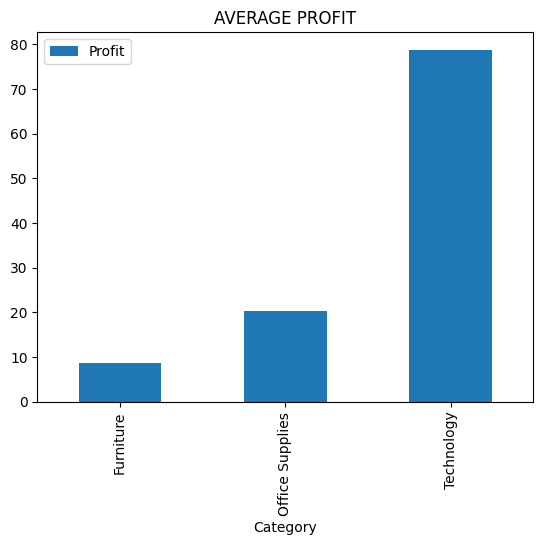

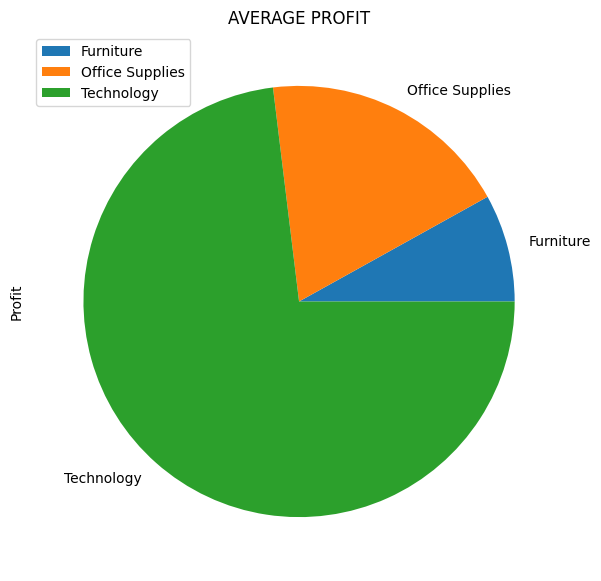

<Figure size 2000x2000 with 0 Axes>

In [81]:
df1.groupby("Category").agg({"Profit":"mean"}).plot(kind="bar")
plt.title("AVERAGE PROFIT")
plt.savefig('1.png', dpi=300)
df1.groupby("Category").agg({"Profit": "mean"}).plot(kind="pie",subplots=True,figsize=(10,7))
plt.title("AVERAGE PROFIT")
plt.figure(figsize=(20,20))
plt.savefig('2.png', dpi=300)

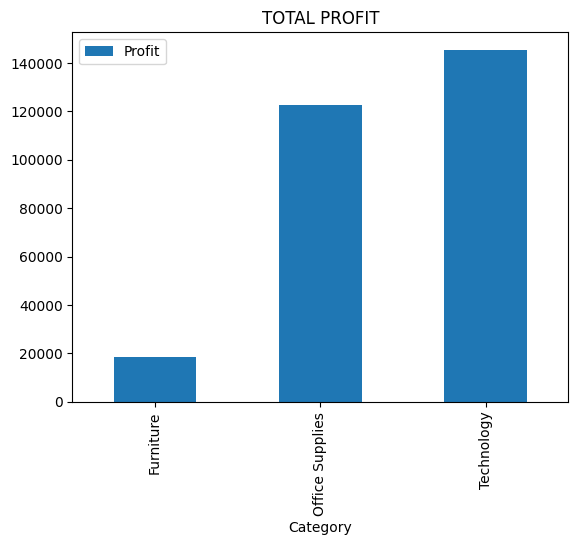

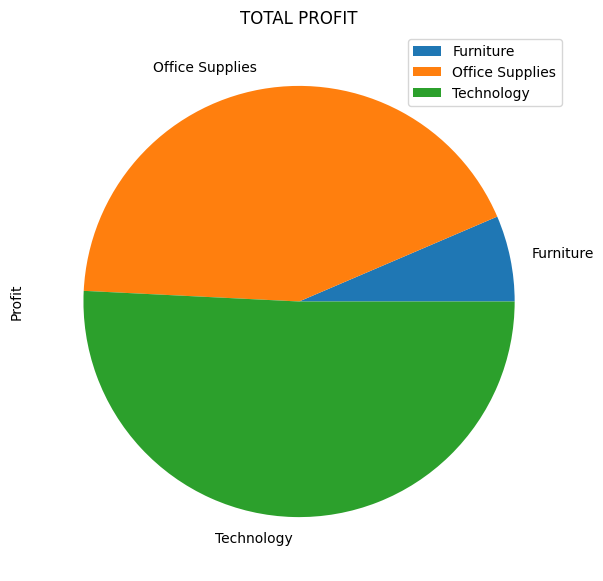

<Figure size 2000x1500 with 0 Axes>

In [82]:
df1.groupby("Category").agg({"Profit": "sum"}).plot(kind="bar")
plt.title("TOTAL PROFIT")
plt.savefig('3.png', dpi=300)
df1.groupby("Category").agg({"Profit": "sum"}).plot(kind="pie",subplots=True,figsize=(10,7))
plt.title("TOTAL PROFIT")
plt.figure(figsize=(20,15))
plt.savefig('4.png', dpi=300)

### 🛒 1. Which product categories and sub-categories drive the most profit?
#We can see in total profit Office Supplies have a good share which is much more in demand as compaired to other two.

#We cann see there is high average profit in Technology category.

#We can say the market share of Office supples is more

#The total profit share of three categories is

Furniture	6.442551%

Office Supplies	42.769579%

Technology	50.787870%

#The average profit share of three categories is

Furniture	8.699327

Office Supplies	20.327050

Technology	78.752002

#The market share of three categories is

Technology	36.398821

Furniture	32.300171

Office Supplies	31.301008

### SUB-CATEGORY ANALYSIS
#Copiers have highest average profit and highest profit share in sales followed by phones and accesories.

#Store has high profits in Copiers,Accesories and phones in technology category.

#Blinders,Paper and Storage have high profit share in Office Supplies category.

#Tables are highly loss making category in Furniture category while chairs are profit making.

#Only books and Tables are loss making products in all categories.

#Phones have highest market share followed by chairs

PROFIT SHARES OF TOP-3 AND BOTTOM-3 CATEGORIES

Copiers	    19.419834

Phones	    15.543364

Accessories	14.642832

Supplies   -0.415193

Bookcases  -1.212497

Tables	   -6.189129

MARKET SHARE

Phones	14.365616

Chairs	14.297796

Storage	9.744190

In [22]:
(df1.groupby("Category").agg({"Profit":"sum"})/df["Profit"].sum())*100

,Profit
Category,
Furniture,6.442551
Office Supplies,42.769579
Technology,50.787870


In [23]:
df1.groupby("Category").agg({"Profit":"mean"})

,Profit
Category,
Furniture,8.699327
Office Supplies,20.327050
Technology,78.752002


array([<Axes: ylabel='Sales'>], dtype=object)

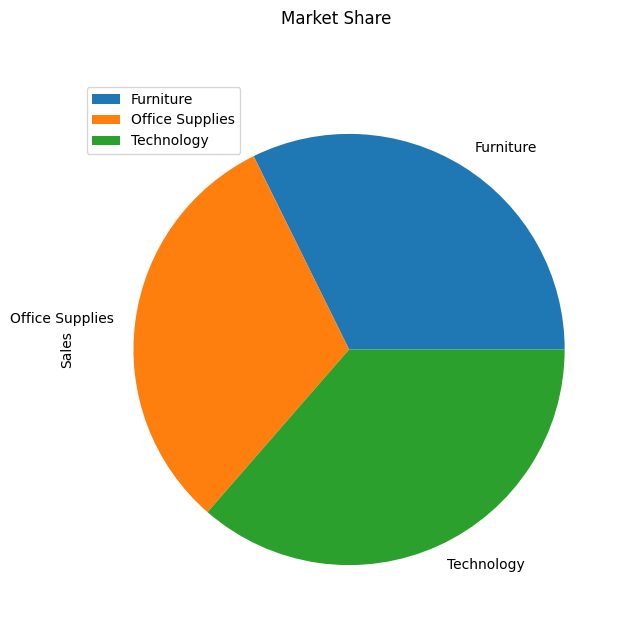

In [83]:
df1.groupby("Category").agg({"Sales":"sum"}).plot(kind="pie",subplots=True,title="Market Share",figsize=(10,7))

In [25]:
(df1.groupby("Category").agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False)/(df["Sales"].sum()))*100

,Sales
Category,
Technology,36.398821
Furniture,32.300171
Office Supplies,31.301008


In [26]:
df1

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,NumberOfDays
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,2 days
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,5 days
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932,5 days
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,5 days


Text(0.5, 1.0, 'SUB-CATEGORY MARKET SHARE')

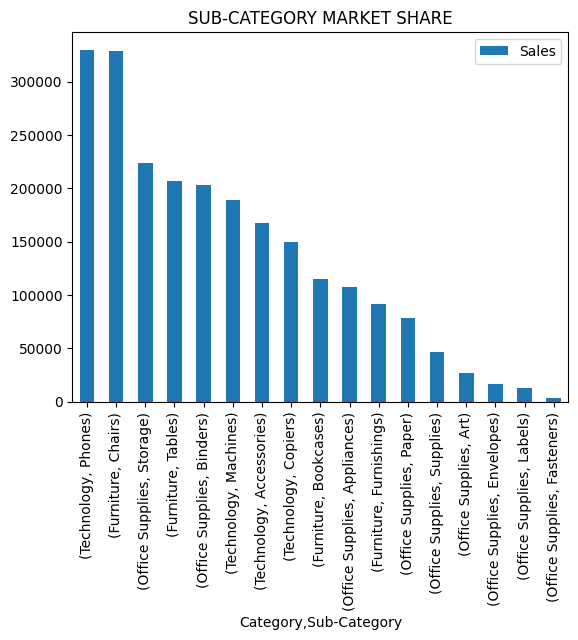

In [27]:
df1.groupby(["Category","Sub-Category"]).agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False).plot(kind="bar")
plt.title("SUB-CATEGORY MARKET SHARE")

Text(0.5, 1.0, 'SUB-CATEGORY PROFIT SHARE')

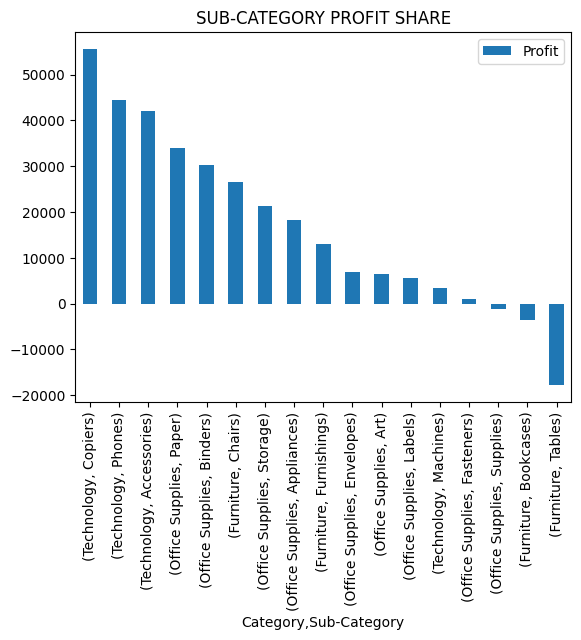

In [28]:
df1.groupby(["Category","Sub-Category"]).agg({"Profit":"sum"}).sort_values(by="Profit",ascending=False).plot(kind="bar")
plt.title("SUB-CATEGORY PROFIT SHARE")

Text(0.5, 1.0, 'AVERAGE PROFIT')

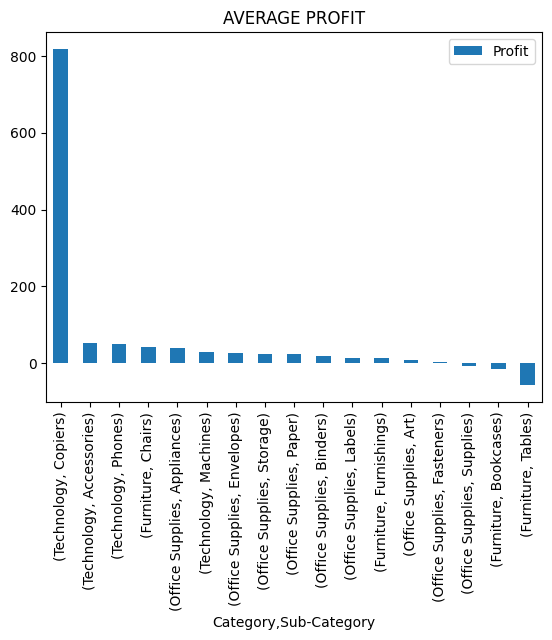

In [29]:
df1.groupby(["Category","Sub-Category"]).agg({"Profit":"mean"}).sort_values(by="Profit",ascending=False).plot(kind="bar")
plt.title("AVERAGE PROFIT")

In [30]:
(((df1.groupby("Sub-Category").agg({"Profit":"sum"}))/(df["Profit"].sum()))*100).sort_values(by="Profit",ascending=False)

,Profit
Sub-Category,
Copiers,19.419834
Phones,15.543364
Accessories,14.642832
Paper,11.890336
Binders,10.552401
Chairs,9.284372
Storage,7.429835
Appliances,6.333168
Furnishings,4.559804


In [31]:
((df1.groupby("Sub-Category").agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False)/(df["Sales"].sum()))*100)

,Sales
Sub-Category,
Phones,14.365616
Chairs,14.297796
Storage,9.744190
Tables,9.009466
Binders,8.854808
Machines,8.237792
Accessories,7.286273
Copiers,6.509140
Bookcases,5.000869


### 📉 2. Which regions or states are underperforming in terms of profit?
#### Westen region have highest market share followed by east
#### Southern region has least market share but central has least profit share
#### A imbalance between market share and profit share is there in central region
##### MARKET SHARE
West	31.580078

East	29.548188

Central	21.819594

South	17.05214
##### PROFIT SHARE
West	37.855997

East	31.956610

South	16.323295

Central	13.864098

#### California and Newyork lead in both terms of market share and profit segment.
#### Texas being 3 largest in terms of market but texas is largest loss maker followed by Ohio in terms of loss making.
#### Vermont has highest average profit with Ohio having highest average loss


In [32]:
df1.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,NumberOfDays
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,7 days


<Axes: xlabel='count', ylabel='Region'>

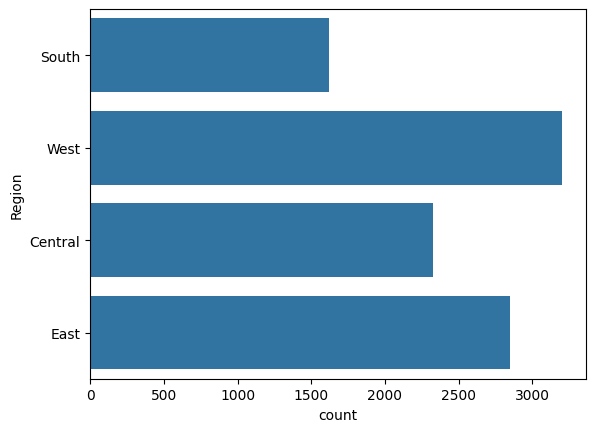

In [33]:
sns.countplot(df["Region"])

array([<Axes: title={'center': 'Profit'}, xlabel='Region'>], dtype=object)

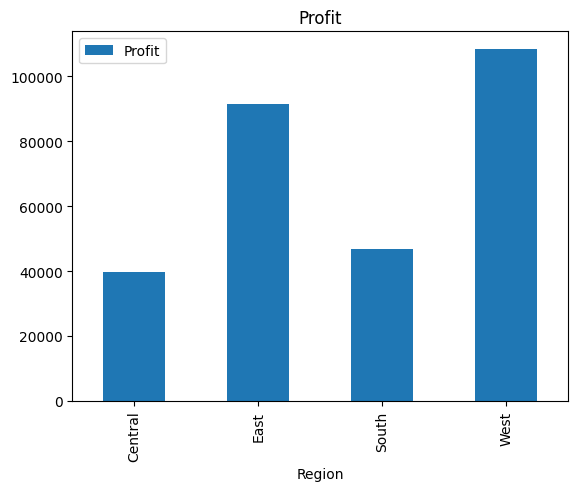

In [34]:
df.groupby("Region").agg({"Profit":"sum"}).plot(kind="bar",subplots=True)

In [35]:
((df.groupby("Region").agg({"Profit":"sum"}))/df["Profit"].sum())*100

,Profit
Region,
Central,13.864098
East,31.956610
South,16.323295
West,37.855997


In [36]:
((df1.groupby("Region").agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False))/(df["Sales"].sum()))*100

,Sales
Region,
West,31.580078
East,29.548188
Central,21.819594
South,17.052140


In [37]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

<Axes: title={'center': 'MARKET SHARE OF STATES'}, xlabel='State'>

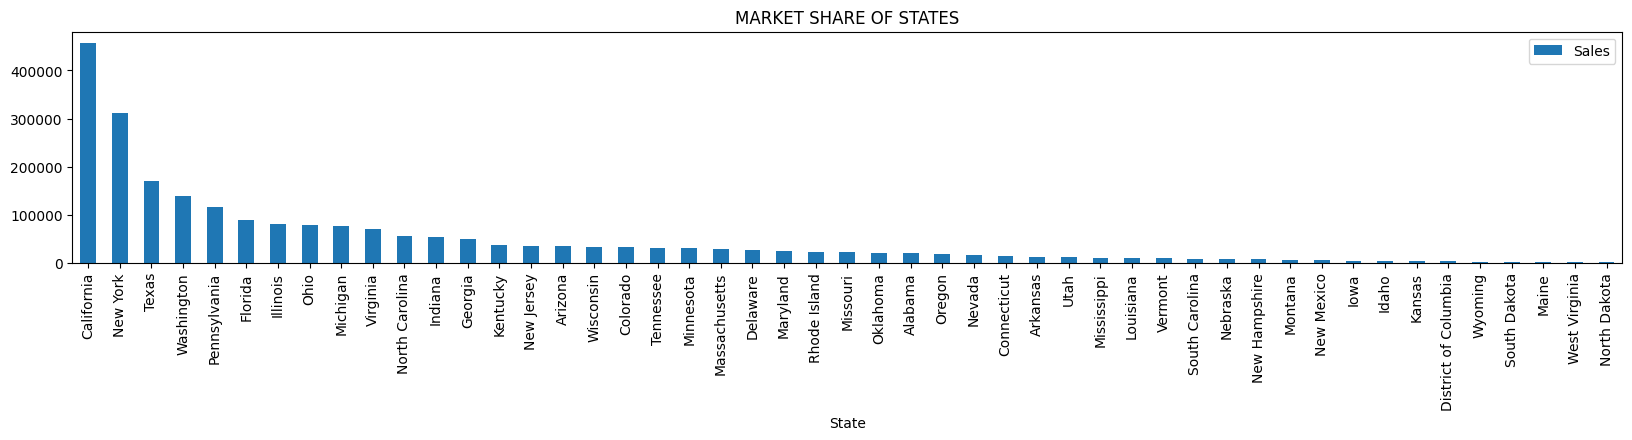

In [87]:
df1.groupby("State").agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False).plot(kind="bar",figsize=(20,3),title="MARKET SHARE OF STATES")

<Axes: title={'center': 'PROFIT SHARE OF STATES'}, xlabel='State'>

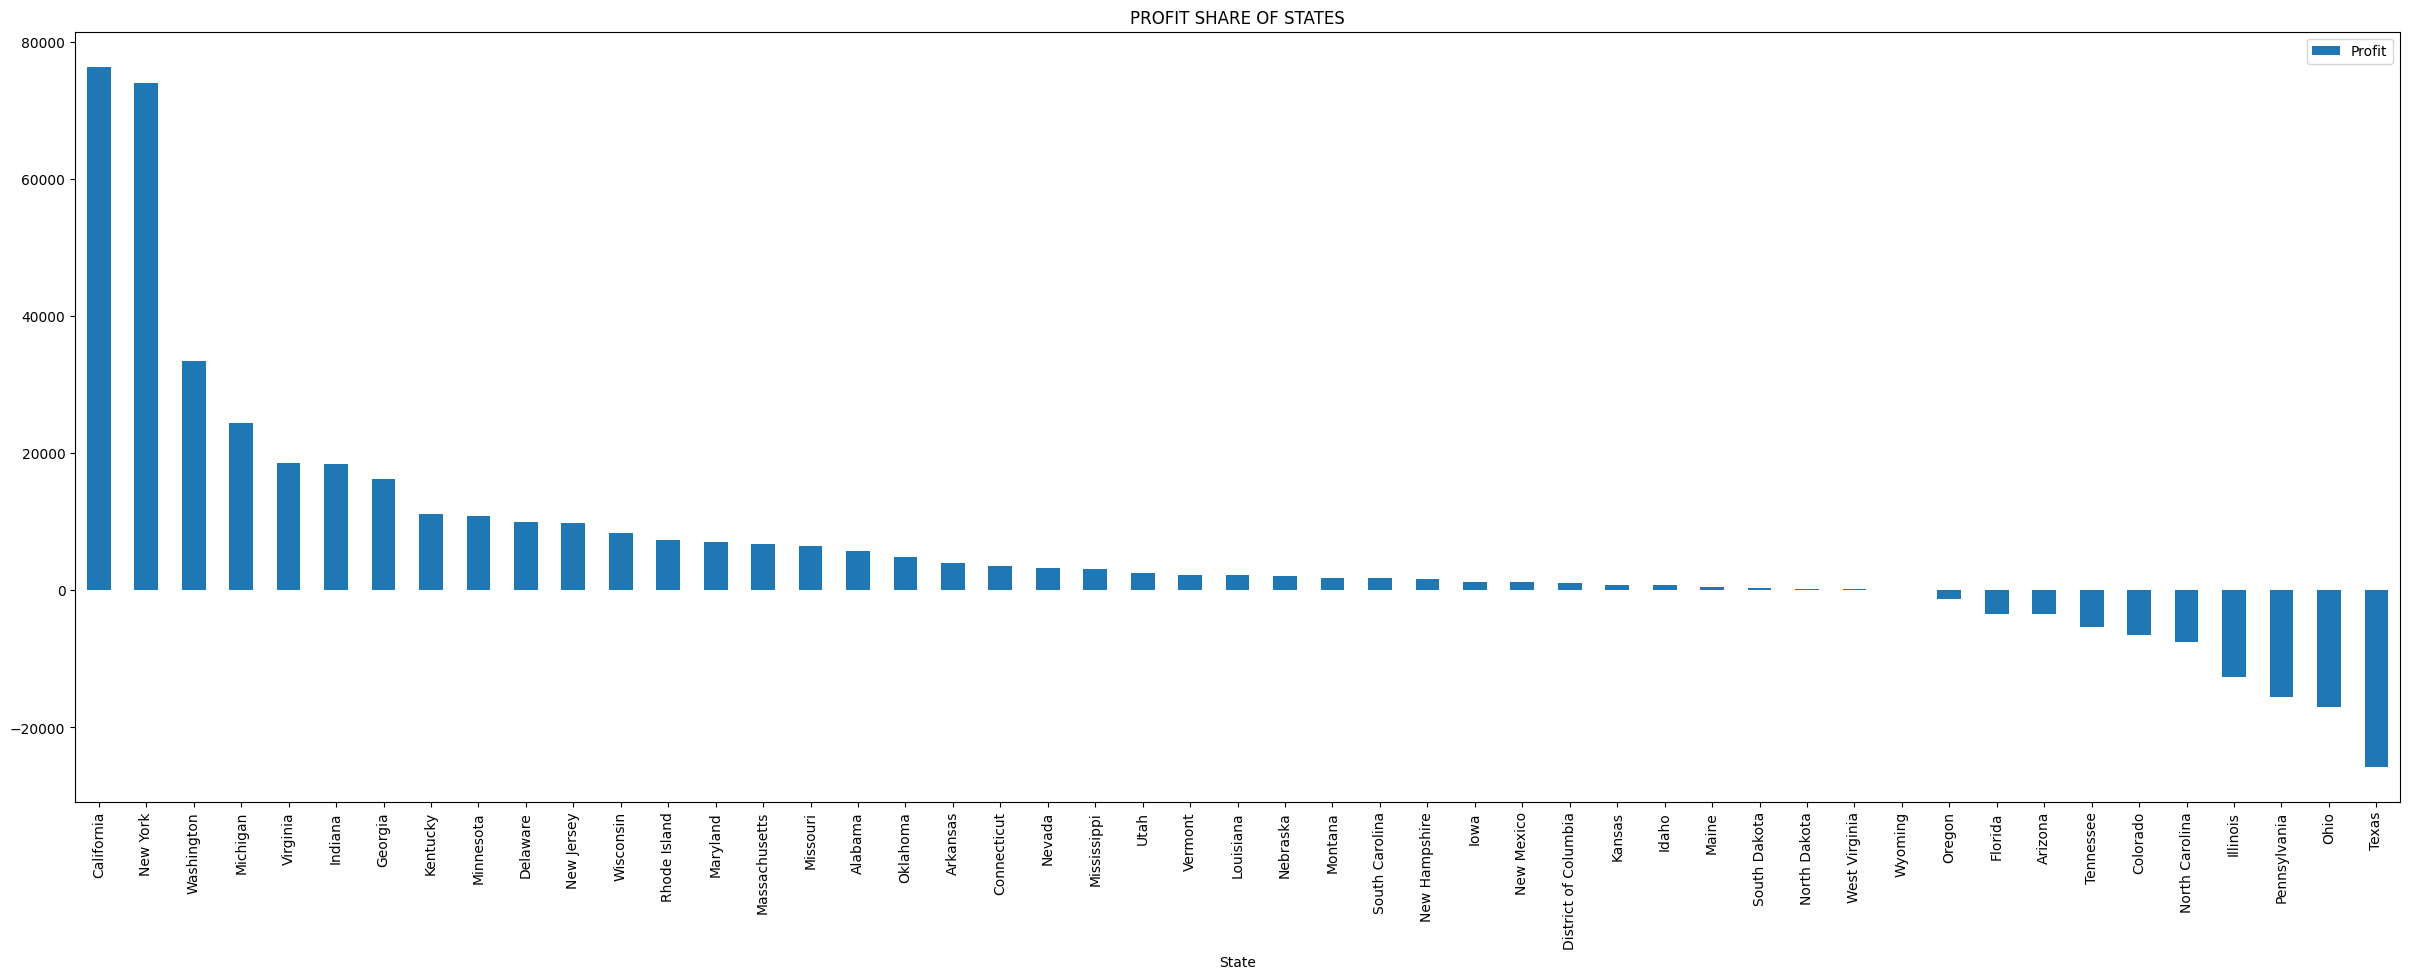

In [39]:
df1.groupby("State").agg({"Profit":"sum"}).sort_values(by="Profit",ascending=False).plot(kind="bar",figsize=(30, 10),title="PROFIT SHARE OF STATES")

<Axes: title={'center': 'PROFIT SHARE OF STATES'}, xlabel='State'>

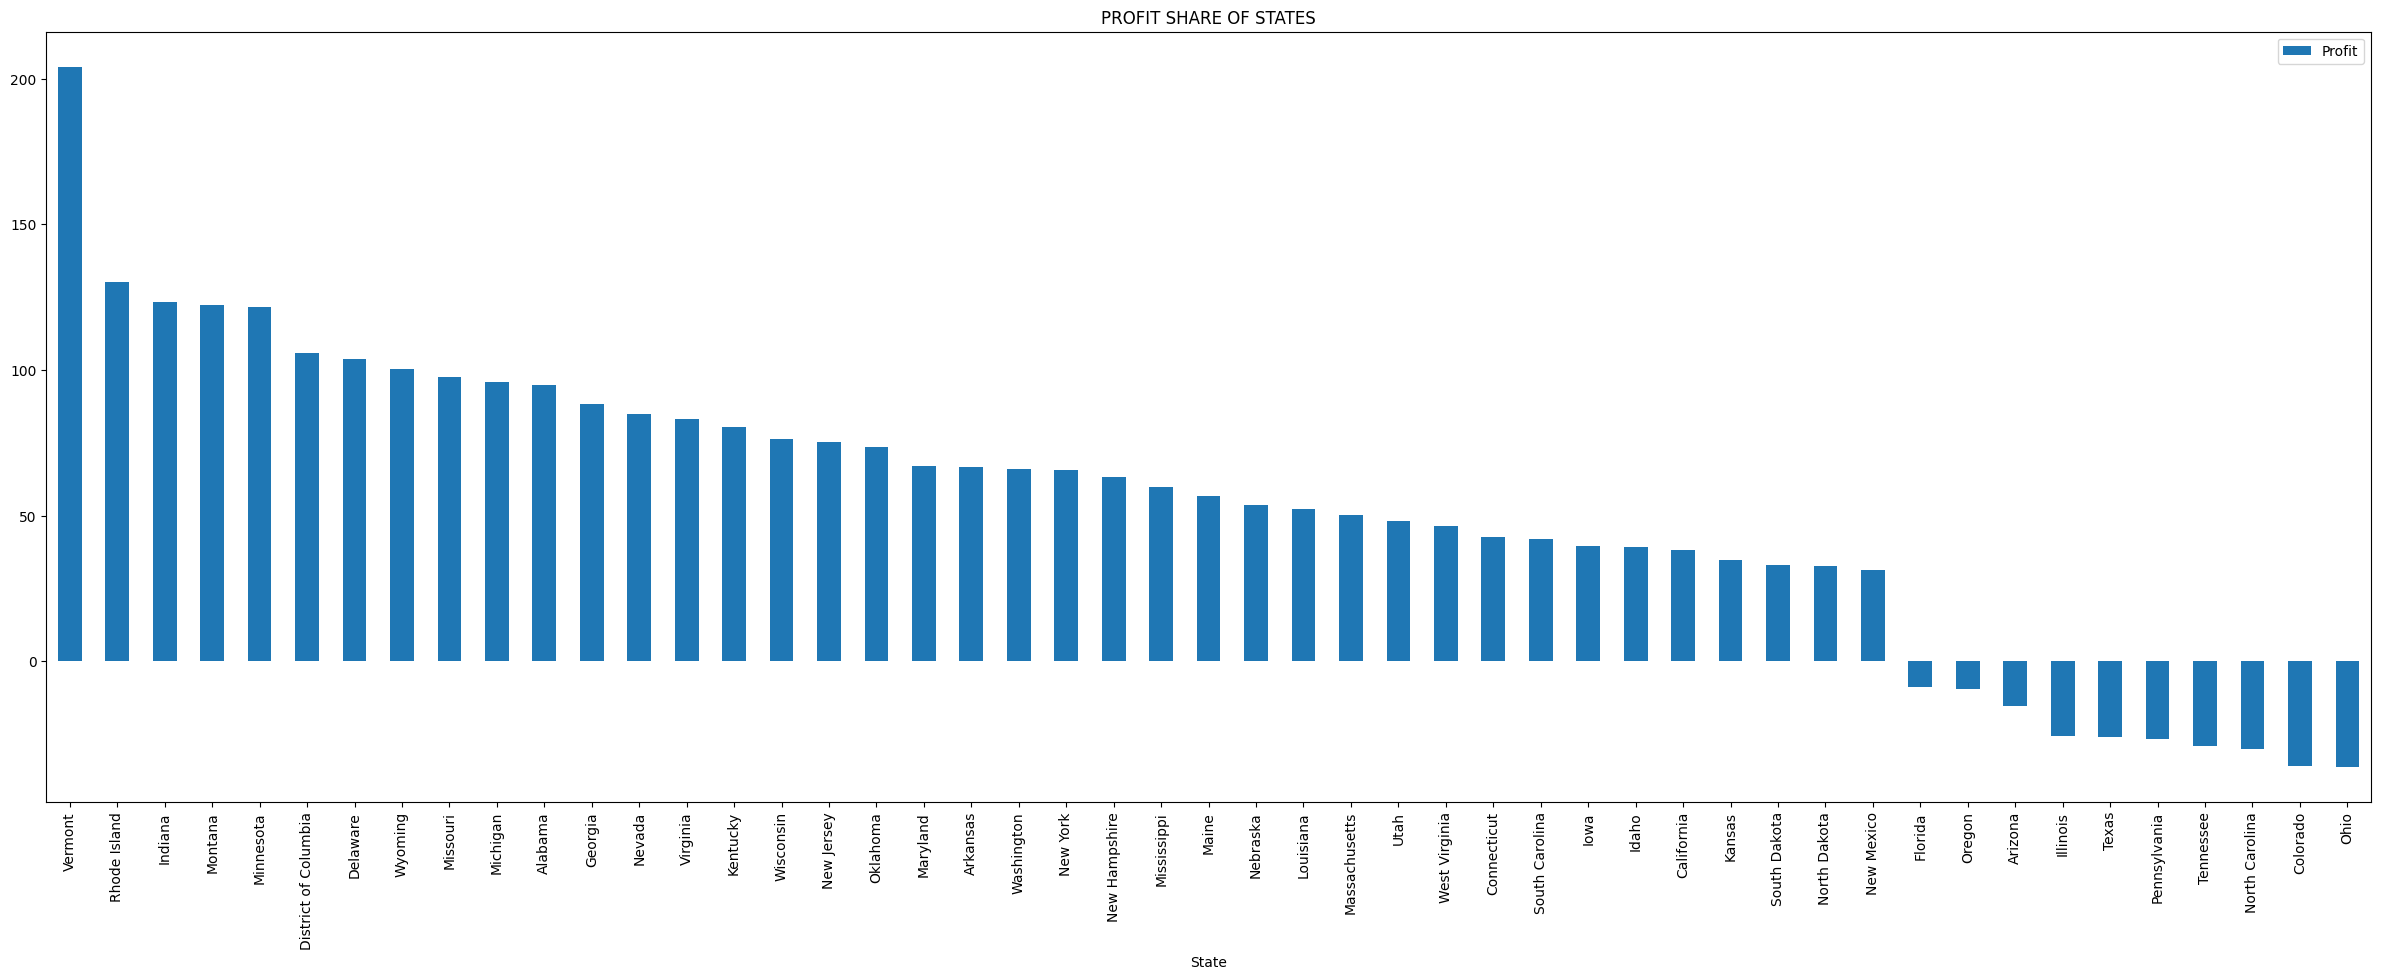

In [40]:
df1.groupby("State").agg({"Profit":"mean"}).sort_values(by="Profit",ascending=False).plot(kind="bar",figsize=(30, 10),title="PROFIT SHARE OF STATES")

### ⏱ 3. What is the average time taken for delivery? Any delay patterns?
#### Average is approximately 4 days
#### The average delivery time region wise is almost equal and shows no discrepancy
#### District of Columbia has highest average delivery time of 5 days and 16 hours
#### Category has no major role in expexted time of delivery
#### Segment has no major role in delivery time
#### While art pieces take a longer time than others


In [41]:
df1.head(5)

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,NumberOfDays
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,7 days


In [42]:
df1["NumberOfDays"].mean()

Timedelta('3 days 22:59:46.311787072')

In [43]:
df1.groupby("Region").agg({"NumberOfDays":"mean"}).sort_values(by="NumberOfDays")

,NumberOfDays
Region,
East,3 days 21:48:32.359550561
West,3 days 22:18:50.689978145
South,3 days 22:59:33.333333333
Central,4 days 01:23:41.093413689


In [44]:
df1.groupby("State").agg({"NumberOfDays":"mean"}).sort_values(by="NumberOfDays",ascending=False)

,NumberOfDays
State,
District of Columbia,5 days 16:48:00
Wyoming,5 days 00:00:00
Maine,5 days 00:00:00
Montana,4 days 14:24:00
New Mexico,4 days 12:19:27.567567567
Oklahoma,4 days 11:38:10.909090909
Minnesota,4 days 11:35:43.820224719
New Jersey,4 days 10:09:13.846153846
South Dakota,4 days 10:00:00


In [45]:
df1.groupby("Sub-Category").agg({"NumberOfDays":"mean"}).sort_values(by="NumberOfDays",ascending=False)

,NumberOfDays
Sub-Category,
Art,4 days 01:17:47.336683417
Binders,4 days 00:32:08.824688115
Supplies,4 days 00:22:44.210526315
Envelopes,4 days 00:22:40.629921259
Labels,4 days 00:03:57.362637362
Phones,4 days 00:01:37.187851518
Appliances,3 days 23:44:32.961373390
Fasteners,3 days 23:26:49.216589861
Storage,3 days 23:24:15.319148936


In [46]:
df1.groupby("Ship Mode").agg({"NumberOfDays":"mean"}).sort_values(by="NumberOfDays")

,NumberOfDays
Ship Mode,
Same Day,0 days 01:03:38.784530386
First Class,2 days 04:23:05.695708712
Second Class,3 days 05:42:47.197943444
Standard Class,5 days 00:09:24.611260053


In [47]:
df1.groupby("Segment").agg({"NumberOfDays":"mean"}).sort_values(by="NumberOfDays")

,NumberOfDays
Segment,
Home Office,3 days 22:07:44.385866517
Consumer,3 days 22:36:13.454055095
Corporate,4 days 00:10:58.013245033


# 📦 5. Is there a relationship between discount and profit?
#### Discounts and profits are negatively corelated to each other with a corelation of -0.219
#### Discount and sales are not much corelated to one another

<Axes: xlabel='Discount', ylabel='Profit'>

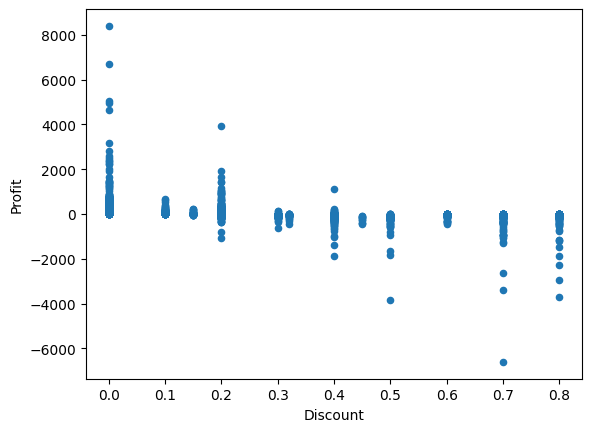

In [48]:
df1.plot(kind="scatter",x="Discount",y="Profit")

<Axes: xlabel='Discount', ylabel='Sales'>

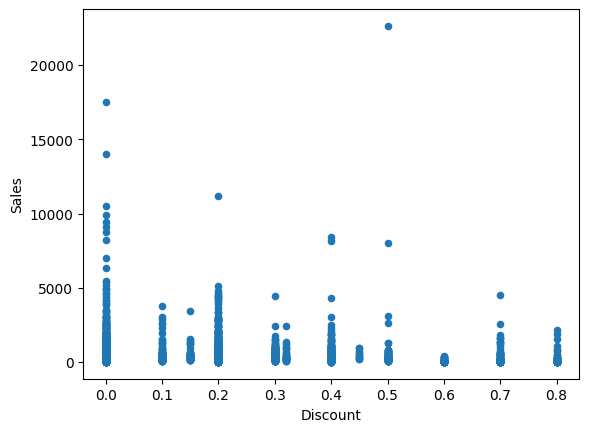

In [53]:
df1.plot(kind="scatter",x="Discount",y="Sales")

In [51]:
df1["Discount"].corr(df1["Profit"])


np.float64(-0.2194874563717678)

In [52]:
df1["Discount"].corr(df1["Sales"])

np.float64(-0.028190124157535475)

### 🧭 6. How do different shipping modes affect profit/delivery speed?
#### The market share of standard class is highest.
#### The profit share of standard class is highest.

Standard Class	57.294167

Second Class	20.058391

First Class  	17.098586

Same Day	    5.548856

#### The highest average profit is in First Class
#### First class has a lower market share but higher profit share while inverse is true for standard class
Standard Class	59.124814

Second Class	19.989265

First Class	    15.298115

Same Day	    5.587806

#### Ship Mode

Same Day	0 days 01 hour

First Class	2 days 04 hour

Second Class	3 days 05 hour

Standard Class	5 days 

In [75]:
df1.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,NumberOfDays
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3 days
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3 days
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,4 days
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,7 days
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,7 days


<Axes: title={'center': 'PROFIT v/s SHIPMENT MODE'}, xlabel='Ship Mode'>

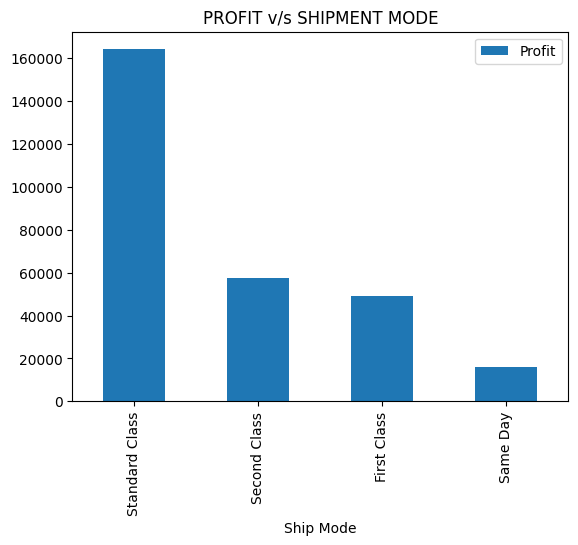

In [63]:
df1.groupby("Ship Mode").agg({"Profit":"sum"}).sort_values(by="Profit",ascending=False).plot(kind="bar",title="PROFIT v/s SHIPMENT MODE")

array([<Axes: ylabel='Sales'>], dtype=object)

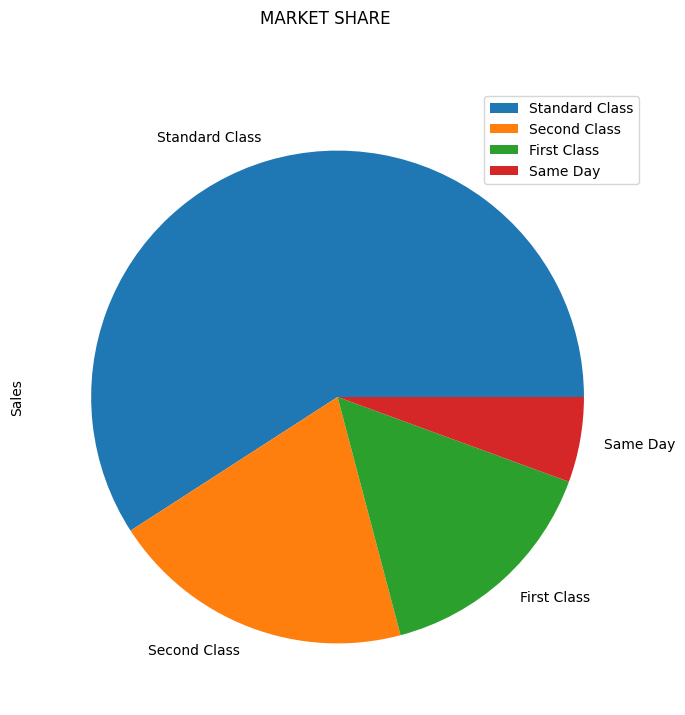

In [71]:
df1.groupby("Ship Mode").agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False).plot(kind="pie",subplots=True,figsize=(10,8),title="MARKET SHARE")

<Axes: xlabel='Ship Mode'>

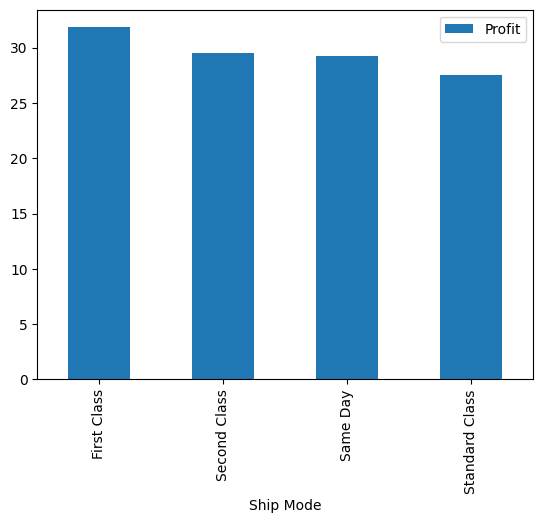

In [62]:
df1.groupby("Ship Mode").agg({"Profit":"mean"}).sort_values(by="Profit",ascending=False).plot(kind="bar")

In [72]:
(df1.groupby("Ship Mode").agg({"Profit":"sum"}).sort_values(by="Profit",ascending=False)/df["Profit"].sum())*100

,Profit
Ship Mode,
Standard Class,57.294167
Second Class,20.058391
First Class,17.098586
Same Day,5.548856


In [74]:
(df1.groupby("Ship Mode").agg({"Sales":"sum"}).sort_values(by="Sales",ascending=False)/df["Sales"].sum())*100

,Sales
Ship Mode,
Standard Class,59.124814
Second Class,19.989265
First Class,15.298115
Same Day,5.587806


In [76]:
df1.groupby("Ship Mode").agg({"NumberOfDays":"mean"}).sort_values(by="NumberOfDays",ascending=False)

,NumberOfDays
Ship Mode,
Standard Class,5 days 00:09:24.611260053
Second Class,3 days 05:42:47.197943444
First Class,2 days 04:23:05.695708712
Same Day,0 days 01:03:38.784530386


#### SUMMARY
1. Top Performing Categories & Sub-Categories
Technology drives the most profit overall with the highest average profit per order.

Office Supplies also perform well, especially Binders and Storage.

Copiers, Phones, and Accessories are the most profitable sub-categories.

Tables, Bookcases, and Supplies are loss-making.

2. Regional & State-Level Profitability
The West is the top-performing region by both sales and profit.

The Central region underperforms — large market, low profitability.

California and New York lead in profits.

Texas and Ohio are loss-making despite high sales volume.

3. Discount Impact
Discounts are negatively correlated with profit (-0.22).

Increasing discounts does not lead to higher sales.

Over-discounting may hurt profitability.

4. Shipping Modes
Standard Class dominates in volume and profit share, but First Class has the highest average profit.

Same-Day shipping has the fastest delivery but smallest profit share.

5. Delivery Times
Average delivery time is around 4 days.

District of Columbia has the slowest delivery (5+ days).

Category or segment doesn't significantly affect delivery time.

